# Введение. Базовые методы анализа данных.

# Библиотеки

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns



# Задание параметров ```matplotlib```

In [2]:
# параметр для задания толщины линии
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 6
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
# параметр для задания шрифта на осях 
plt.rcParams['legend.fontsize'] = 24
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 36
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.figsize'] = (8.0, 4.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 10

# Построение графиков

## Построение одного графика

In [3]:
def plot():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['legend.fontsize'] = 18
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['figure.figsize'] = (8.0, 4.0)
    plt.rcParams['font.size'] = 18
    ###########################################

    x = np.linspace(-np.pi, np.pi)
    y = np.sin(x)
    plt.plot(x, y, label='$y = sin(x)$')
    x = np.arange(-1, 2)
    y = x
    plt.plot(x, y, label='$y = x$')
    # отрисовка легенды графика
    plt.legend(loc='best')
    # подпись осей
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    # заголовок
    plt.title('Title')
    # отрисовка сетки на графике
    plt.grid()
    plt.show()

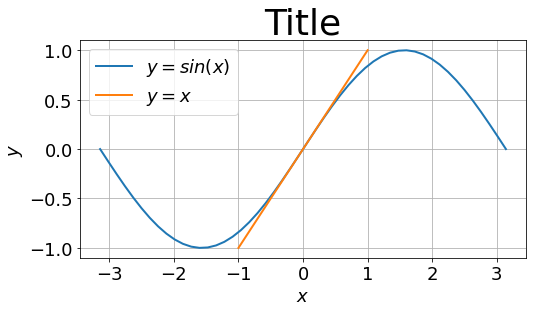

In [4]:
plot()

## Построение нескольких графиков

In [5]:
def plot():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['legend.fontsize'] = 18
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['figure.figsize'] = (16.0, 8.0)
    plt.rcParams['font.size'] = 50
    ###########################################

    fig = plt.figure();

    gs = gridspec.GridSpec(2, 2) #  2 = num of str and 2 = num of col

    subs = []
    for sub in gs:
        subs.append(fig.add_subplot(sub))
    subs = np.reshape(subs, [2,2])

    subplotNames = ['First', 'Second', 'Third', 'Forth']

    for i in range(4):
        subs[i//2][i%2].annotate(s=subplotNames[i], xy=(0,0))
        subs[i//2][i%2].set_xlim(-1,1)
        subs[i//2][i%2].set_ylim(-1,1)

    plt.show()

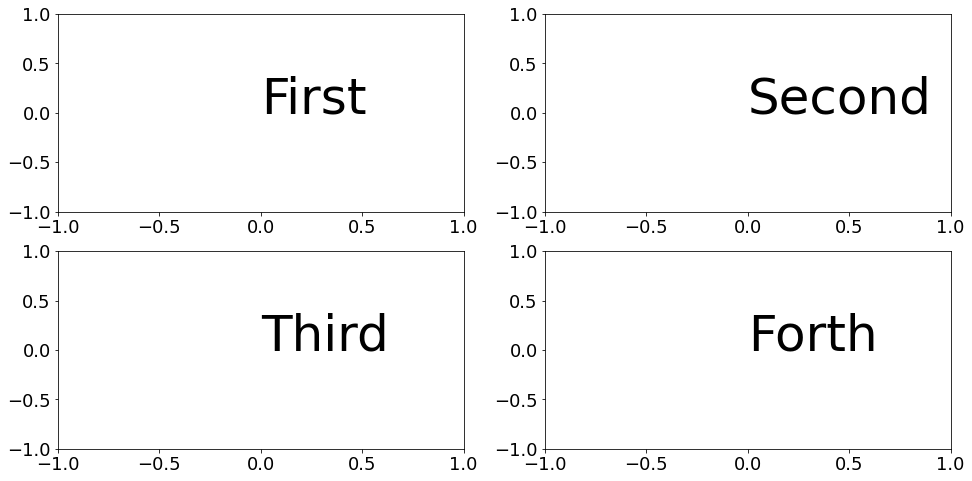

In [6]:
plot()

# Работа с ```pandas```

## Загрузка данных
Загрузим данные из csv-файла с помощью библиотеки pandas 

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [23]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Некоторые функции по работе с ```pandas```

### Сэмплируем данные из выборки

In [24]:
data.sample(n=2, random_state=42)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.5,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.9,3.53,32.4


### Выбираем интересующую нас колонку

In [26]:
data['medv'].head(n=2)

0    24.0
1    21.6
Name: medv, dtype: float64

### Выбираем несколько колонок

In [27]:
data.iloc[:, 1:3].head(n=2)

,zn,indus
0,18.0,2.31
1,0.0,7.07


### Выбираем интересующие нас строки

In [28]:
data.iloc[1:3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


### Конвертируем данные из ```pandas``` в ```numpy``` массив

In [29]:
data2 = data.to_numpy()
data3 = data.values

In [30]:
(data3 - data2).sum()

0.0

# Визуализация

### Описание столбцов матрицы, описывающей выборку

In [31]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

```CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s```

### Выберем столбец MEDV

In [32]:
x = data['medv'].values

*ДЗ начало*

In [49]:
#data = pd.read_csv('a1.csv')

In [34]:
data.head(10)
data.mode()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01501,0.0,18.1,0.0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,6.36,50.0
1,14.33370,NaN,NaN,NaN,NaN,6.127,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN
2,NaN,NaN,NaN,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN
3,NaN,NaN,NaN,NaN,NaN,6.229,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN
4,NaN,NaN,NaN,NaN,NaN,6.405,NaN,NaN,NaN,NaN,NaN,NaN,18.13,NaN
5,NaN,NaN,NaN,NaN,NaN,6.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
data.median(0)

crim         0.25651
zn           0.00000
indus        9.69000
chas         0.00000
nox          0.53800
rm           6.20850
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
b          391.44000
lstat       11.36000
medv        21.20000
dtype: float64

In [37]:
data.mean(0)

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
medv        22.532806
dtype: float64

In [38]:
data.var()

crim          73.986578
zn           543.936814
indus         47.064442
chas           0.064513
nox            0.013428
rm             0.493671
age          792.358399
dis            4.434015
rad           75.816366
tax        28404.759488
ptratio        4.686989
b           8334.752263
lstat         50.994760
medv          84.586724
dtype: float64

In [50]:
#data_no_negative = data[data['field'] >= 0]

#data_no_negative.median(0)

In [ ]:
#data_no_negative

In [41]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [43]:
#k = 42
#print('The k-th order statistic is:', np.partition(np.asarray(list(data['field'])), k)[k])

*ДЗ конец*

## Гистограмма

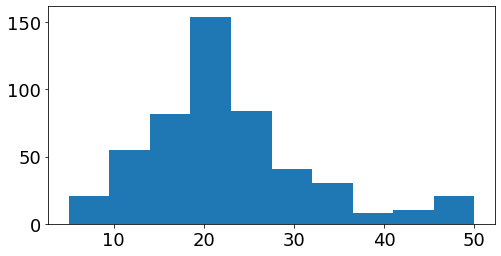

In [44]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

plt.hist(x)
plt.show()

## Ядерная оценка

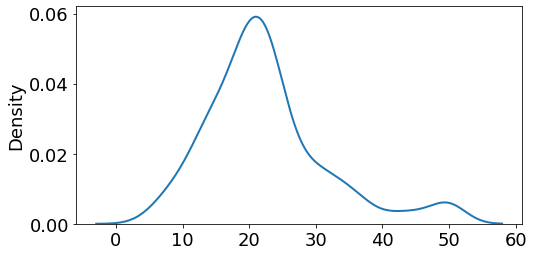

In [45]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sns.kdeplot(x)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


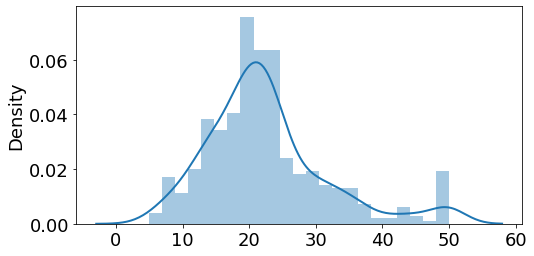

In [46]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sns.distplot(x)
plt.show()

## Корреляционная матрица
Отобразим корреляционную матрицу для всех признаков объекта

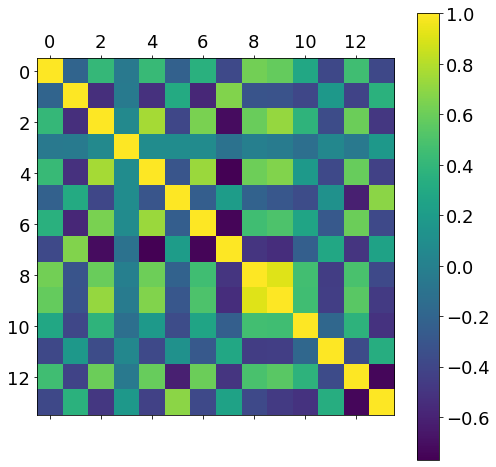

In [47]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
###########################################

matrix = np.corrcoef(data.values, rowvar=False)
im = plt.matshow(matrix)
plt.colorbar(im)
plt.show()

## Аналогичный график в seaborn + pandas

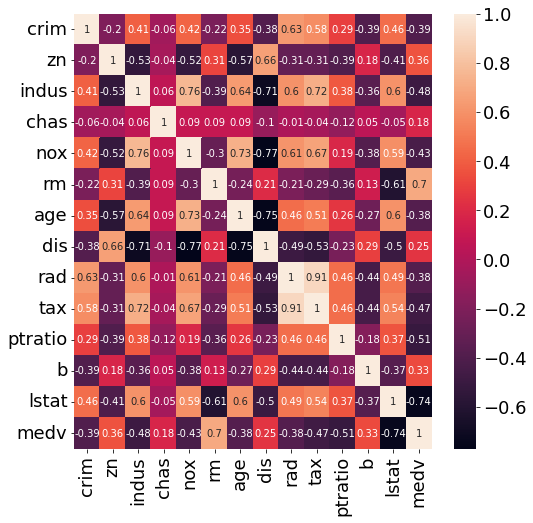

In [48]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 10
###########################################

cor = data.corr().round(2)
sns.heatmap(data=cor, annot=True)
plt.show()

## Попарные диаграммы рассеяния для первых трех признаков

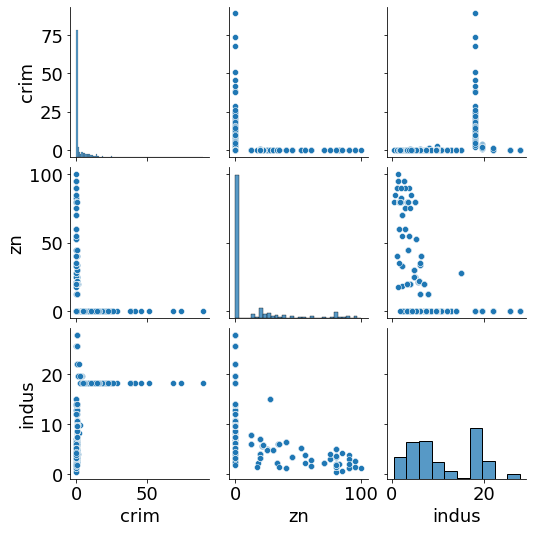

In [51]:
sns.pairplot(data.iloc[:,0:3])
plt.show()
# если по диагонали расположены (y = +-x) - полная корелляция
# где y и x - столбцы

## Аналогичный график в matplotlib

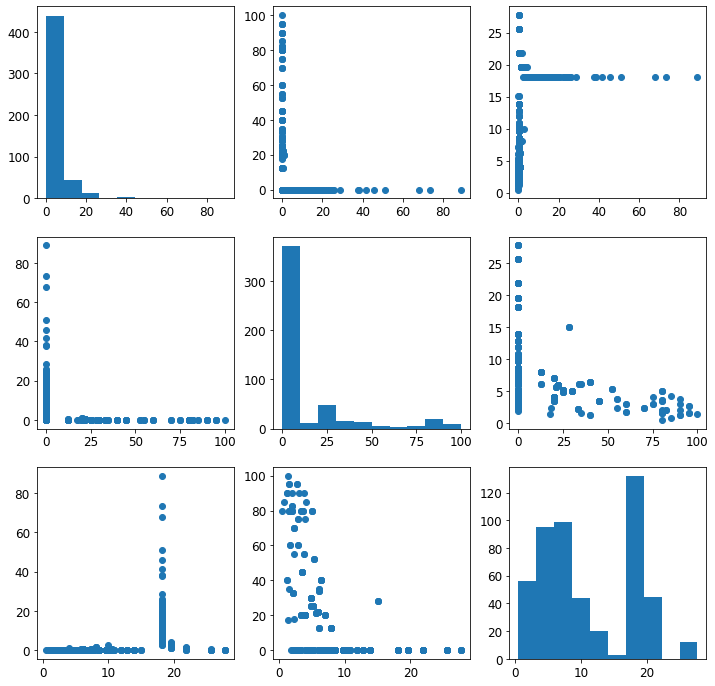

In [54]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
###########################################

def make_scatter(i, j, subplot):
    subplot.scatter(data.values[:, i], data.values[:, j])

def make_plot(i, j, subplot):
    if i == j:
        # Ваш код здесь
        subplot.hist(data.values[:, i])

    else:
        # Ваш код здесь
        make_scatter(i, j, subplot)
    
for i in range(3):
    for j in range(3):
        subplot = plt.subplot(3, 3, i*3 + j + 1) # нумерация с единицы
        make_plot(i, j, subplot)
        

# Выборочные оценки

## Среднее, медиану и дисперсию

In [57]:
print('mean={}'.format(np.mean(x)))
print('std={}, std={}'.format(np.std(x), np.std(x, ddof=1))) # смещенное и несмещенное среднеквадратичное отклонения соотв.
#data.describe()

mean=22.532806324110677
std=9.188011545278203, std=9.197104087379818


## Мода распределение

In [58]:
print('median={}'.format(np.median(x)))
print('mode={}'.format(st.mode(x)))

median=21.2
mode=ModeResult(mode=array([50.]), count=array([16]))


## Минимальное и максимальное значение в выборке

In [59]:
print('maximum={}; ({})'.format(np.max(x), np.argmax(x)))
print('minimum={}; ({})'.format(np.min(x), np.argmin(x)))

maximum=50.0; (161)
minimum=5.0; (398)


## Квантили распределения

In [60]:
alpha = 0.5
print('q(0.5)={}'.format(np.quantile(x, alpha)))

q(0.5)=21.2


## Интерквартильный размах

In [61]:
# Ваш код здесь
np.quantile(x, 0.75) - np.quantile(x, 0.25) 


7.975000000000001

```Ожидаемый ответ: ~7.975```

## Ранг $x=16$

In [62]:
ind = np.where(x==16)[0]
print('rank(16)={}'.format(st.rankdata(x)[ind]))

rank(16)=[111.]


## Построение cdf для подвыборки, содержащей только значения $>= 21.2$

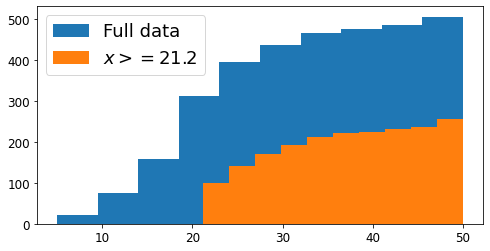

In [63]:
# cdf - ФУНКЦИЯ распределения
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

plt.hist(x, cumulative=True, label='Full data')
plt.hist(x[x>=21.2], cumulative=True, label='$x>=21.2$')
plt.legend(loc='best')
plt.show()

## Выборочные оценки для подвыборки содержащей только значения $>=21.2$

In [69]:
# Ваш код здесь
np.mean(x[x>=21.2])
np.std(x[x>=21.2])
np.std(x[x>=21.2], ddof=1)
np.median(x[x>=21.2])
st.mode(x[x>=21.2])
# и тд ...

ModeResult(mode=array([50.]), count=array([16]))

```Ожидаемый ответ
mean=29.001960784313727
std=8.224008139636966, std=8.240181229279456
median=25.0
mode=ModeResult(mode=array([50.]), count=array([16]))
maximum=50.0; (67)
minimum=21.2; (16)
q(0.5)=25.0
размах=9.600000000000001```